In [33]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pylab as pl
from matplotlib import colors, cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colors

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [34]:
L_space = np.array([1,2,4,8,16,32,64])

In [35]:
path ="rec_lattice_bounds/column_migration/sim_data_mig/"
rough_1_files = glob.glob(path+"rough_1_*.txt")
rough_2_files = glob.glob(path+"rough_2_*.txt")
rough_4_files = glob.glob(path+"rough_4_*.txt")
rough_8_files = glob.glob(path+"rough_8_*.txt")
rough_16_files = glob.glob(path+"rough_16_*.txt")
rough_32_files = glob.glob(path+"rough_32_*.txt")
rough_64_files = glob.glob(path+"rough_64_*.txt")

het_files = glob.glob(path+"het*.txt")

In [38]:

K_var = [1000000]
K_str = ["K"+str(K)+"_" for K in K_var]


B_var = [0, 2.5, 3.5, 6, 10 ]
B_str = ["B"+str(B)+"_" for B in B_var]



In [37]:
n_files =100
rough_data_mig=np.zeros((5,1,n_files,7,1000,3)) 
het_data_mig=np.zeros((5,1,n_files,1000,2)) 
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):
        #print('hi')


        rough_sub_files_1=[]
        rough_sub_files_2=[]
        rough_sub_files_4=[]
        rough_sub_files_8=[]
        rough_sub_files_16=[]
        rough_sub_files_32=[]
        rough_sub_files_64=[]


        

        het_sub_files = []
        #for fr10,fr20,fr30,fr40,fr50,fr60,fr70 in zip(rough_10_files,rough_20_files,rough_30_files,rough_40_files,rough_50_files,rough_50_files,rough_50_files):
        #    print(fr10)
        #    if K in fr10 and B in fr10:
        #        rough_sub_files_10.append(fr10)

        for fr1,fr2,fr4,fr8,fr16,fr32,fr64,fh in zip(rough_1_files,rough_2_files,rough_4_files,rough_8_files,rough_16_files,rough_32_files,rough_64_files,het_files):
            #print(fr10)

            if K in fr1 and B in fr1:
                rough_sub_files_1.append(fr1)
            if K in fr2 and B in fr2:
                rough_sub_files_2.append(fr2)
            if K in fr4 and B in fr4:
                rough_sub_files_4.append(fr4)
            if K in fr8 and B in fr8:
                rough_sub_files_8.append(fr8)
            if K in fr16 and B in fr16:
                rough_sub_files_16.append(fr16)
            if K in fr32 and B in fr32:
                rough_sub_files_32.append(fr32)
            if K in fr64 and B in fr64:
                rough_sub_files_64.append(fr64)


            if K in fh and B in fh:
                het_sub_files.append(fh)
#         for i, fr10,fr20,fr30,fr40,fr50,fr60,fr70,fr80,fr90,fr100,fr110,fr120,fr130,fr140,fr150,fr160,fr170,fr180 in zip(range(len(rough_sub_files_10)),rough_sub_files_10,rough_sub_files_20,rough_sub_files_30,rough_sub_files_40,
#                                                              rough_sub_files_50,rough_sub_files_60,rough_sub_files_70,rough_sub_files_80,
#                                                                                     rough_sub_files_90,rough_sub_files_100,rough_sub_files_110,
#                                                                                                        rough_sub_files_120,rough_sub_files_130,rough_sub_files_140,rough_sub_files_150,rough_sub_files_160,rough_sub_files_170,rough_sub_files_180):
#             rough_data[Bn,Kn,i,0]= np.loadtxt(fr10,delimiter =  ', ')
#             rough_data[Bn,Kn,i,1]= np.loadtxt(fr20,delimiter =  ', ')
#             rough_data[Bn,Kn,i,2]= np.loadtxt(fr30,delimiter =  ', ')
#             rough_data[Bn,Kn,i,3]= np.loadtxt(fr40,delimiter =  ', ')
#             rough_data[Bn,Kn,i,4]= np.loadtxt(fr50,delimiter =  ', ')
#             rough_data[Bn,Kn,i,5]= np.loadtxt(fr60,delimiter =  ', ')
#             rough_data[Bn,Kn,i,6]= np.loadtxt(fr70,delimiter =  ', ')
#             rough_data[Bn,Kn,i,7]= np.loadtxt(fr80,delimiter =  ', ')
#             rough_data[Bn,Kn,i,8]= np.loadtxt(fr90,delimiter =  ', ')
#             rough_data[Bn,Kn,i,9]= np.loadtxt(fr100,delimiter =  ', ')
#             rough_data[Bn,Kn,i,10]= np.loadtxt(fr110,delimiter =  ', ')
#             rough_data[Bn,Kn,i,11]= np.loadtxt(fr120,delimiter =  ', ')
#             rough_data[Bn,Kn,i,12]= np.loadtxt(fr130,delimiter =  ', ')
#             rough_data[Bn,Kn,i,13]= np.loadtxt(fr140,delimiter =  ', ')
#             rough_data[Bn,Kn,i,14]= np.loadtxt(fr150,delimiter =  ', ')
#             rough_data[Bn,Kn,i,15]= np.loadtxt(fr160,delimiter =  ', ')
#             rough_data[Bn,Kn,i,16]= np.loadtxt(fr170,delimiter =  ', ')
#             rough_data[Bn,Kn,i,17]= np.loadtxt(fr180,delimiter =  ', ')

            
                
        
        for i,fr1,fr2,fr4,fr8,fr16,fr32,fr64,fh in zip(range(n_files),rough_sub_files_1,rough_sub_files_2,rough_sub_files_4,rough_sub_files_8,rough_sub_files_16,rough_sub_files_32,rough_sub_files_64,het_sub_files):
         
            #arr = np.loadtxt(fr,delimiter =  ', ',skiprows=1)
            #rough_data[Bn,Kn,i,:,0]= np.concatenate((np.repeat(np.array([[0,10,20,30,40,50]]),1000,axis=0),
            #                             np.array([arr[:,-1]-8,arr[:,-1]-6,arr[:,-1]-4,arr[:,-1]-2,arr[:,-1]]).T),axis=1)
            #rough_data[Bn,Kn, i,:,1] = arr[:,1:-1]
            #print(i)
 

            rough_data_mig[Bn,Kn,i,0]= np.loadtxt(fr1,delimiter =  ', ')
            rough_data_mig[Bn,Kn,i,1]= np.loadtxt(fr2,delimiter =  ', ')
            rough_data_mig[Bn,Kn,i,2]= np.loadtxt(fr4,delimiter =  ', ')
            rough_data_mig[Bn,Kn,i,3]= np.loadtxt(fr8,delimiter =  ', ')
            rough_data_mig[Bn,Kn,i,4]= np.loadtxt(fr16,delimiter =  ', ')
            rough_data_mig[Bn,Kn,i,5]= np.loadtxt(fr32,delimiter =  ', ')
            rough_data_mig[Bn,Kn,i,6]= np.loadtxt(fr64,delimiter =  ', ')



            het_data_big[Bn,Kn,i]= np.loadtxt(fh,delimiter =  ', ')



            


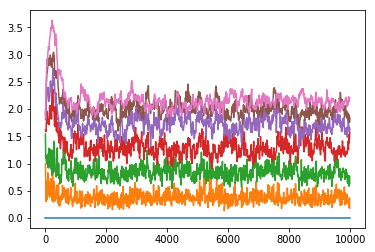

In [41]:
plt.plot(np.mean(rough_data_mig[-1,0,:,0,:,0],axis=0),np.mean(rough_data_mig[-1,0,:,:,:,2],axis=0).T/L_space)

In [218]:
path ="rec_lattice_bounds/column_migration/sim_data_nomig/"
rough_1_files = glob.glob(path+"rough_1_*.txt")
rough_2_files = glob.glob(path+"rough_2_*.txt")
rough_4_files = glob.glob(path+"rough_4_*.txt")
rough_8_files = glob.glob(path+"rough_8_*.txt")
rough_16_files = glob.glob(path+"rough_16_*.txt")
rough_32_files = glob.glob(path+"rough_32_*.txt")
rough_64_files = glob.glob(path+"rough_64_*.txt")

het_files = glob.glob(path+"het*.txt")

In [219]:

K_var = [1000000]
K_str = ["K"+str(K)+"_" for K in K_var]


B_var = [0, 2.5, 3.5, 6, 10 ]
B_str = ["B"+str(B)+"_" for B in B_var]



In [220]:
n_files =100
rough_data_nomig=np.zeros((5,1,n_files,7,1000,3)) 
het_data_nomig=np.zeros((5,1,n_files,1000,2)) 
rough_diffs=np.zeros((5,5))
def diff_fit(x, a, b):
     return 2*a*x+b
for Kn, Ki,K in zip(range(len(K_var)),K_var,K_str):
    for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):
        #print('hi')


        rough_sub_files_1=[]
        rough_sub_files_2=[]
        rough_sub_files_4=[]
        rough_sub_files_8=[]
        rough_sub_files_16=[]
        rough_sub_files_32=[]
        rough_sub_files_64=[]


        

        het_sub_files = []
        #for fr10,fr20,fr30,fr40,fr50,fr60,fr70 in zip(rough_10_files,rough_20_files,rough_30_files,rough_40_files,rough_50_files,rough_50_files,rough_50_files):
        #    print(fr10)
        #    if K in fr10 and B in fr10:
        #        rough_sub_files_10.append(fr10)

        for fr1,fr2,fr4,fr8,fr16,fr32,fr64,fh in zip(rough_1_files,rough_2_files,rough_4_files,rough_8_files,rough_16_files,rough_32_files,rough_64_files,het_files):
            #print(fr10)

            if K in fr1 and B in fr1:
                rough_sub_files_1.append(fr1)
            if K in fr2 and B in fr2:
                rough_sub_files_2.append(fr2)
            if K in fr4 and B in fr4:
                rough_sub_files_4.append(fr4)
            if K in fr8 and B in fr8:
                rough_sub_files_8.append(fr8)
            if K in fr16 and B in fr16:
                rough_sub_files_16.append(fr16)
            if K in fr32 and B in fr32:
                rough_sub_files_32.append(fr32)
            if K in fr64 and B in fr64:
                rough_sub_files_64.append(fr64)


            if K in fh and B in fh:
                het_sub_files.append(fh)
#         for i, fr10,fr20,fr30,fr40,fr50,fr60,fr70,fr80,fr90,fr100,fr110,fr120,fr130,fr140,fr150,fr160,fr170,fr180 in zip(range(len(rough_sub_files_10)),rough_sub_files_10,rough_sub_files_20,rough_sub_files_30,rough_sub_files_40,
#                                                              rough_sub_files_50,rough_sub_files_60,rough_sub_files_70,rough_sub_files_80,
#                                                                                     rough_sub_files_90,rough_sub_files_100,rough_sub_files_110,
#                                                                                                        rough_sub_files_120,rough_sub_files_130,rough_sub_files_140,rough_sub_files_150,rough_sub_files_160,rough_sub_files_170,rough_sub_files_180):
#             rough_data[Bn,Kn,i,0]= np.loadtxt(fr10,delimiter =  ', ')
#             rough_data[Bn,Kn,i,1]= np.loadtxt(fr20,delimiter =  ', ')
#             rough_data[Bn,Kn,i,2]= np.loadtxt(fr30,delimiter =  ', ')
#             rough_data[Bn,Kn,i,3]= np.loadtxt(fr40,delimiter =  ', ')
#             rough_data[Bn,Kn,i,4]= np.loadtxt(fr50,delimiter =  ', ')
#             rough_data[Bn,Kn,i,5]= np.loadtxt(fr60,delimiter =  ', ')
#             rough_data[Bn,Kn,i,6]= np.loadtxt(fr70,delimiter =  ', ')
#             rough_data[Bn,Kn,i,7]= np.loadtxt(fr80,delimiter =  ', ')
#             rough_data[Bn,Kn,i,8]= np.loadtxt(fr90,delimiter =  ', ')
#             rough_data[Bn,Kn,i,9]= np.loadtxt(fr100,delimiter =  ', ')
#             rough_data[Bn,Kn,i,10]= np.loadtxt(fr110,delimiter =  ', ')
#             rough_data[Bn,Kn,i,11]= np.loadtxt(fr120,delimiter =  ', ')
#             rough_data[Bn,Kn,i,12]= np.loadtxt(fr130,delimiter =  ', ')
#             rough_data[Bn,Kn,i,13]= np.loadtxt(fr140,delimiter =  ', ')
#             rough_data[Bn,Kn,i,14]= np.loadtxt(fr150,delimiter =  ', ')
#             rough_data[Bn,Kn,i,15]= np.loadtxt(fr160,delimiter =  ', ')
#             rough_data[Bn,Kn,i,16]= np.loadtxt(fr170,delimiter =  ', ')
#             rough_data[Bn,Kn,i,17]= np.loadtxt(fr180,delimiter =  ', ')

            
                
        
        for i,fr1,fr2,fr4,fr8,fr16,fr32,fr64,fh in zip(range(n_files),rough_sub_files_1,rough_sub_files_2,rough_sub_files_4,rough_sub_files_8,rough_sub_files_16,rough_sub_files_32,rough_sub_files_64,het_sub_files):
         
            #arr = np.loadtxt(fr,delimiter =  ', ',skiprows=1)
            #rough_data[Bn,Kn,i,:,0]= np.concatenate((np.repeat(np.array([[0,10,20,30,40,50]]),1000,axis=0),
            #                             np.array([arr[:,-1]-8,arr[:,-1]-6,arr[:,-1]-4,arr[:,-1]-2,arr[:,-1]]).T),axis=1)
            #rough_data[Bn,Kn, i,:,1] = arr[:,1:-1]
            #print(i)
 

            rough_data_nomig[Bn,Kn,i,0]= np.loadtxt(fr1,delimiter =  ', ')
            rough_data_nomig[Bn,Kn,i,1]= np.loadtxt(fr2,delimiter =  ', ')
            rough_data_nomig[Bn,Kn,i,2]= np.loadtxt(fr4,delimiter =  ', ')
            rough_data_nomig[Bn,Kn,i,3]= np.loadtxt(fr8,delimiter =  ', ')
            rough_data_nomig[Bn,Kn,i,4]= np.loadtxt(fr16,delimiter =  ', ')
            rough_data_nomig[Bn,Kn,i,5]= np.loadtxt(fr32,delimiter =  ', ')
            rough_data_nomig[Bn,Kn,i,6]= np.loadtxt(fr64,delimiter =  ', ')

       

            het_data_nomig[Bn,Kn,i]= np.loadtxt(fh,delimiter =  ', ')

        for i in range(5):
            diff_data =np.mean(rough_data_nomig[Bn,Kn,:,i+1,500:,2],axis=0)/L_space[-1]
            pars, cov = curve_fit(f=diff_fit, xdata=np.mean(rough_data_nomig[Bn,Kn,:,i+1,500:,0],axis=0), ydata=diff_data, p0=[0.01, 0.01], bounds=(-np.inf, np.inf))
            rough_diffs[Bn,i] = pars[0]


In [223]:
rough_diffs[0,:]


array([7.21204500e-07, 3.14304066e-05, 1.04552401e-04, 2.65790797e-04,
       5.43366843e-04])

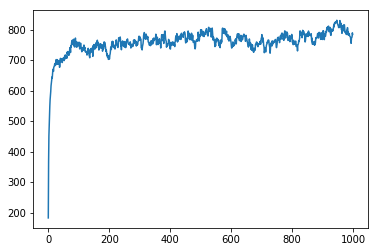

In [208]:
diff_data =np.mean(rough_data_nomig[2,0,:,6,:,2],axis=0)/L_space[0]
plt.plot(diff_data)

In [23]:
L_space = np.array([1,2,4,8,16,32,64])

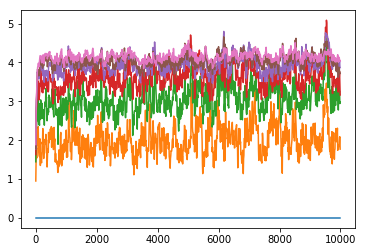

In [229]:
plt.plot(np.mean(rough_data_nomig[0,0,:,0,:,0],axis=0),np.mean(rough_data_nomig[-1,0,:,:,:,2],axis=0).T/L_space)

In [149]:
path ="rec_lattice_bounds/column_migration/sim_data_1D/"
vel_files = glob.glob(path+"pop_*.txt")

In [230]:
n_files =101
D1_Data = np.zeros((5,n_files,1000,2)) 
K_var = [1000000]
K_str = ["K"+str(K)+"_" for K in K_var]

D1_diffs=[]
B_var = [0, 2.5, 3.5, 6, 10 ]
B_str = ["B"+str(B)+"_" for B in B_var]

def diff_fit(x, a, b):
     return 2*a*x+b

for Bn,Bi,B in zip(range(len(B_var)),B_var,B_str):
    #print('hi')


    vel_sub_files=[]
    for f in vel_files:
        if B in f:
            vel_sub_files.append(f)

    for i,f in enumerate(vel_sub_files):
        D1_Data[Bn,i] = np.loadtxt(f,delimiter =  ', ')
        
    diff_data =np.std(D1_Data[Bn,:,400:,1],axis=0)**2
    pars, cov = curve_fit(f=diff_fit, xdata=np.mean(D1_Data[Bn,:,400:,0],axis=0), ydata=diff_data, p0=[0.01, 0.01], bounds=(-np.inf, np.inf))
    
    print(pars[0])
    D1_diffs.append(pars[0])
                
                

0.0020219425991767374
0.00017649863649183737
7.138616442357503e-05
5.027132413674945e-06
0.7009373320726496


In [233]:
rough_diffs[:-1,-1]

array([5.43366843e-04, 8.68383027e-05, 1.84587769e-05, 1.18335868e-05])

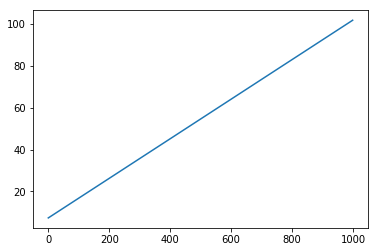

In [221]:
plt.plot(np.std(D1_Data[-1:,:,:,1],axis=1).T)

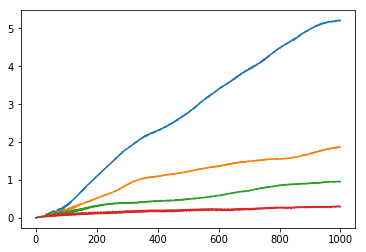

In [194]:
plt.plot(np.std(D1_Data[0,:,:,1],axis=0))
plt.plot(np.std(D1_Data[1,:,:,1],axis=0))
plt.plot(np.std(D1_Data[2,:,:,1],axis=0))
plt.plot(np.std(D1_Data[3,:,:,1],axis=0))


In [98]:
B

'B10_'

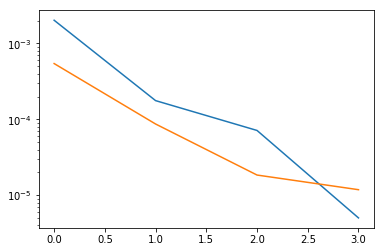

In [234]:
plt.plot(D1_diffs[:-1])
plt.plot(rough_diffs[:-1,-1])
plt.yscale('log')

In [198]:
D1_diffs

[0.000263015803964848,
 5.98959049166355e-05,
 5.043237962690925e-05,
 1.0344013233001468e-05,
 0.004771243624839021]

In [225]:
rough_diffs[:-1,-1]


array([5.43366843e-04, 8.68383027e-05, 1.84587769e-05, 1.18335868e-05])